<a href="https://colab.research.google.com/github/piyush1856/machine-learning-algorithms/blob/main/CrossValidation_%26_K_Fold.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import LinearRegression

# **Cross Validation**

In [2]:
# lets generate a dataset of 100 points
np.random.seed(2)
X = np.random.rand(1000,1)
y = 0.7*(X**5) - \
    2.1*(X**4) + \
    2.3*(X**3) + \
    0.2*(X**2) + \
    0.3* X + \
    0.4*np.random.rand(1000,1)

In [3]:
# 0.6, 0.2, 0.2 split
from sklearn.model_selection import train_test_split
X_tr_cv, X_test, y_tr_cv, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train, X_val, y_train, y_val = train_test_split(X_tr_cv, y_tr_cv, test_size=0.25,random_state=1)

In [4]:
X_train.shape, X_val.shape, X_test.shape

((600, 1), (200, 1), (200, 1))

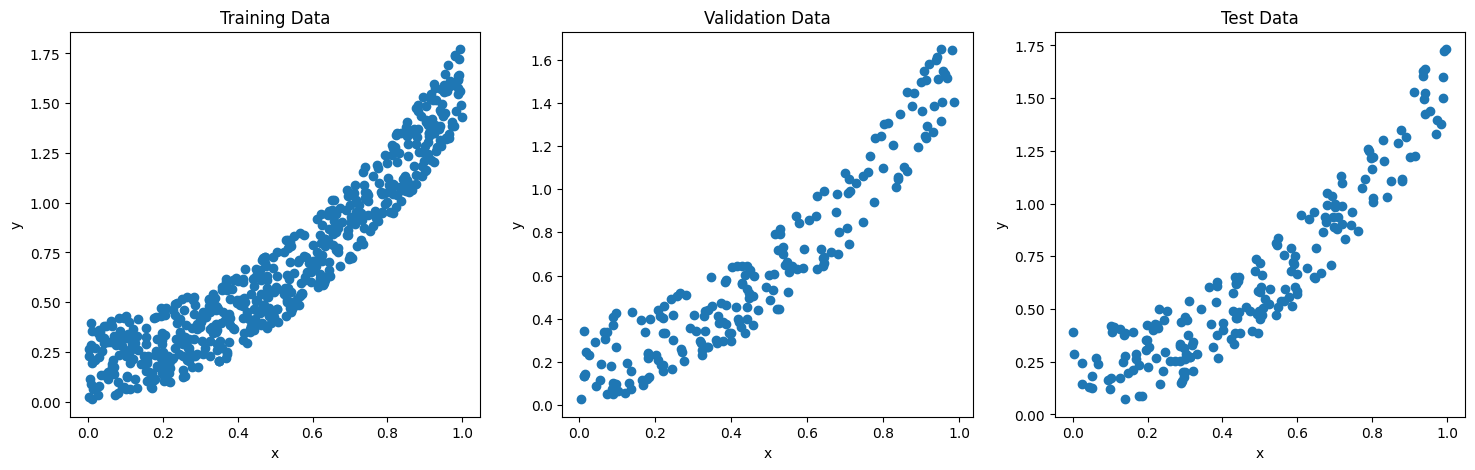

In [5]:
plt.figure(figsize=(18,5))
data_labels = ["Training Data", "Validation Data", "Test Data" ]
x_labels = [X_train, X_val, X_test]
y_labels = [y_train, y_val, y_test]
for i in range(3):
  plt.subplot(1, 3, i+1)
  plt.scatter(x_labels[i], y_labels[i])
  plt.xlabel("x")
  plt.ylabel("y")
  plt.title(data_labels[i])

In [6]:
def adj_r2(X,Y,r_sq):
  adj_r1 = (1 - ((1-r_sq)*(len(Y)-1))/(len(Y)-X.shape[1]-1) )
  return adj_r1

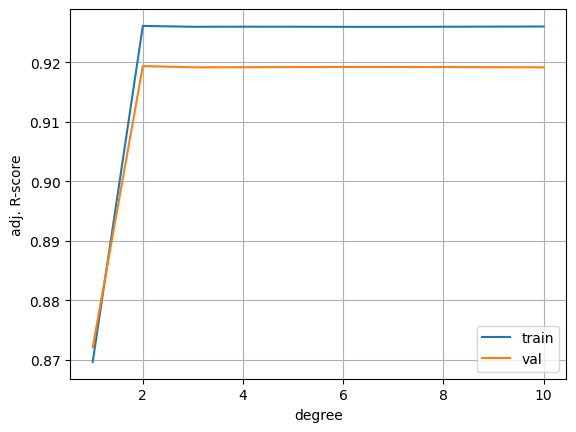

In [7]:
# Same as we did earlier and in the last lecture
max_degree = 11 # max polynomial degree
train_scores = []
val_scores = []
scaler = StandardScaler()
for degree in range(1, max_degree):
  polyreg_scaled = make_pipeline(PolynomialFeatures(degree), scaler, Ridge())
  polyreg_scaled.fit(X_train, y_train)
  train_score = adj_r2(X_train, y_train, polyreg_scaled.score(X_train, y_train))
  val_score= adj_r2(X_val, y_val, polyreg_scaled.score(X_val, y_val))
  train_scores.append(train_score)
  val_scores.append(val_score)
plt.figure()
plt.plot(list(range(1, 11)), train_scores, label="train")
plt.plot(list(range(1, 11)), val_scores, label="val")
plt.legend(loc='lower right')
plt.xlabel("degree")
plt.ylabel("adj. R-score")
plt.grid()
plt.show()

In [8]:
train_scores = []
val_scores = []
rate_list = [0.01, 0.1, 1, 5, 10]
for rate in rate_list:
  polyreg_scaled = make_pipeline(PolynomialFeatures(3), scaler, Ridge(alpha=rate))
  polyreg_scaled.fit(X_train, y_train)
  train_score = adj_r2(X_train, y_train, polyreg_scaled.score(X_train, y_train))
  val_score= adj_r2(X_val, y_val, polyreg_scaled.score(X_val, y_val))
  train_scores.append(train_score)
  val_scores.append(val_score)

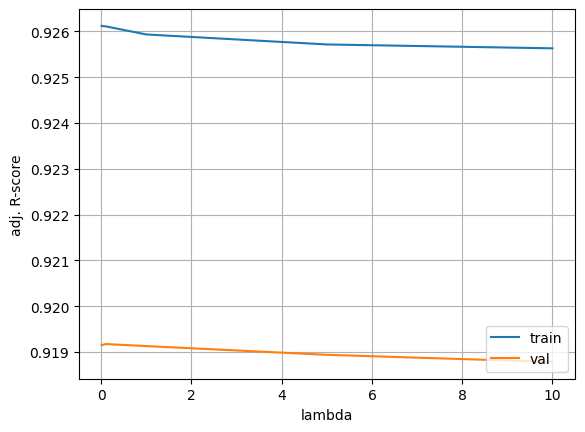

In [9]:
plt.figure()
plt.plot(rate_list, train_scores, label="train")
plt.plot(rate_list, val_scores, label="val")
plt.legend(loc='lower right')
plt.xlabel("lambda")
plt.ylabel("adj. R-score")
plt.grid()
plt.show()

In [10]:
polyreg_scaled = make_pipeline(PolynomialFeatures(2), scaler, Ridge(alpha=0.1))
polyreg_scaled.fit(X_train, y_train)
train_score = adj_r2(X_train, y_train, polyreg_scaled.score(X_train, y_train))
print(f'Training Score = {train_score}')
val_score = adj_r2(X_val, y_val, polyreg_scaled.score(X_val, y_val))
print(f'Validation Score = {val_score}')

Training Score = 0.926114007912501
Validation Score = 0.9191467436858939


In [11]:
# Reporting this as the final score
test_score = adj_r2(X_test, y_test, polyreg_scaled.score(X_test, y_test))
print(f'Testing Score = {test_score}')

Testing Score = 0.9144048947447412


# **K-Fold CV**

In [12]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=10)

In [13]:
# Performing k-fold cross validation
degrees = 11 # number of degrees
train_scores = []
val_scores = []

for degree in range(1, degrees):
    fold_train_scores = []
    fold_val_scores = []

    for train_index, val_index in kf.split(X): #iterating through the K-folds

        X_train, X_val = X[train_index], X[val_index]
        y_train, y_val = y[train_index], y[val_index]

        polyreg_scaled = make_pipeline(PolynomialFeatures(degree), scaler, LinearRegression())
        polyreg_scaled.fit(X_train, y_train) #training model

        train_score = adj_r2(X_train, y_train, polyreg_scaled.score(X_train, y_train))
        val_score= adj_r2(X_val, y_val, polyreg_scaled.score(X_val, y_val))

        fold_train_scores.append(train_score)
        fold_val_scores.append(val_score)

    train_score = np.mean(fold_train_scores)
    val_score = np.mean(fold_val_scores)

    train_scores.append(train_score)
    val_scores.append(val_score)

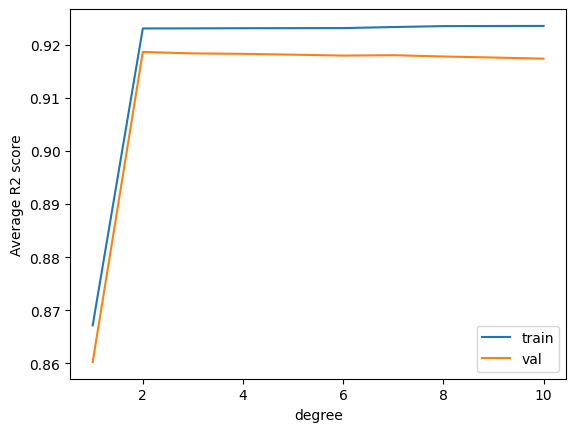

In [14]:
plt.figure()
plt.plot(list(range(1, 11)), train_scores, label="train")
plt.plot(list(range(1, 11)), val_scores, label="val")
plt.legend(loc='lower right')
plt.xlabel("degree")
plt.ylabel("Average R2 score")
plt.show()
